**The Outline of the work :**

1. Dataset overview
2. Importing required libraries
3. Loading the dataset
4. Exploratory Data Analysis
5. Machine Learning Model Building
6. Model Evaluation

## Importing required libraries

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Python libraries
import os 
import sys
from tqdm import tqdm
import pandas as pd #memanipulasi data
import matplotlib.pyplot as plt #kumpulan fungsi yang dapat membuat perubahan dalam gambar seperti area plot, menambah label di plot dll
import numpy as np #memudakan operasi komputasi data numerik
import seaborn as sns #visualisasi data
import scipy as sp #menyelesaikan masalah ilmiah atau matematika
import missingno as msno 
import datetime as dt
import scipy
import scipy.stats
from scipy.stats import ttest_ind
%matplotlib inline

# Model and evaluation
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import sklearn.linear_model as lm
logreg = lm.LogisticRegression()
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
# Sklearn's metrics to evaluate our models
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import backend as K
print(tf.__version__)
print(keras.__version__)

import warnings
warnings.filterwarnings("ignore")

2.8.2
2.8.0


## Loading The Dataset

In [ ]:
# Import Data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# The Data is in JSON Format, so we will use Pandas to Convert to csv
df = pd.read_json(r'/content/drive/MyDrive/Data/transactions.json', lines=True)
df.to_csv (r'/content/drive/MyDrive/Data/data1.csv', index = None)

In [ ]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,...,True,,0.00,,,,False,,,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,...,False,,111.33,,,,False,,,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,...,False,,136.08,,,,False,,,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,...,True,,323.48,,,,False,,,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,...,False,,550.82,,,,False,,,False


In [ ]:
df.tail()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
641909,186770399,186770399,7500,2574.02,2016-12-04T12:29:21,5.37,Apple iTunes,US,US,05,...,False,,4925.98,,,,False,,,False
641910,186770399,186770399,7500,2568.65,2016-12-09T04:20:35,223.70,Blue Mountain eCards,US,US,09,...,False,,4931.35,,,,False,,,False
641911,186770399,186770399,7500,2344.95,2016-12-16T07:58:23,138.42,Fresh Flowers,US,US,02,...,False,,5155.05,,,,False,,,False
641912,186770399,186770399,7500,2206.53,2016-12-19T02:30:35,16.31,abc.com,US,US,09,...,False,,5293.47,,,,False,,,False
641913,186770399,186770399,7500,2190.22,2016-12-28T11:14:14,32.53,Next Day Online Services,US,US,09,...,False,,5309.78,,,,False,,,False


Dari hasil head dan tail terlihat bahwa dalam table terdapat data yang kosong pada type data object

## Exploratory Data Analysis (EDA)

In [ ]:
num_rows, num_cols = df.shape
print("There are {} records and {} fields for each record in the data.".format(num_rows, num_cols))
print("\nColumns (fields) in the data: {}.".format(list(df.columns)))

There are 641914 records and 29 fields for each record in the data.

Columns (fields) in the data: ['accountNumber', 'customerId', 'creditLimit', 'availableMoney', 'transactionDateTime', 'transactionAmount', 'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'transactionType', 'isFraud', 'echoBuffer', 'currentBalance', 'merchantCity', 'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises', 'recurringAuthInd', 'expirationDateKeyInMatch'].


In [ ]:
# to show unique credit card
print("There are {} unique credit card customers.".format(len(np.unique(df["customerId"]))))

There are 5000 unique credit card customers.


Oleh karena itu, dimensi dataset ini adalah 641914 x 29, dengan total 641914 transaksi kartu kredit dari 5000 pelanggan unik.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                641914 non-null  object 
 8   merchantCountryCode       641914 non-null  object 
 9   posEntryMode              641914 non-null  object 
 10  posConditionCode          641914 non-null  object 
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [ ]:
# Replace values with none
df=df.replace('',np.nan)
df.head(50)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,...,True,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,...,False,NaN,111.33,NaN,NaN,NaN,False,NaN,NaN,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,...,False,NaN,136.08,NaN,NaN,NaN,False,NaN,NaN,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,...,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,...,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False
5,733493772,733493772,5000,4449.18,2016-01-16T21:35:27,9.80,Fresh eCards,US,US,05,...,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False
6,733493772,733493772,5000,4439.38,2016-01-24T07:54:01,247.99,Uber,NaN,US,05,...,False,NaN,560.62,NaN,NaN,NaN,False,NaN,NaN,False
7,733493772,733493772,5000,4191.39,2016-01-26T05:28:24,0.00,Universe Massage #95463,US,US,05,...,False,NaN,808.61,NaN,NaN,NaN,False,NaN,NaN,False
8,733493772,733493772,5000,4191.39,2016-01-26T12:18:14,11.54,Universe Massage #70014,US,US,05,...,False,NaN,808.61,NaN,NaN,NaN,True,NaN,NaN,False
9,733493772,733493772,5000,4179.85,2016-01-26T12:19:15,11.54,Universe Massage #70014,US,US,05,...,False,NaN,820.15,NaN,NaN,NaN,True,NaN,NaN,False


In [ ]:
# convert boolean into int
df['isFraud'] = df['isFraud'].replace({True: 1, False: 0})
df['cardPresent'] = df['cardPresent'].replace({True: 1, False: 0})
df['expirationDateKeyInMatch'] = df['expirationDateKeyInMatch'].replace({True: 1, False: 0})
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,...,1,NaN,0.00,NaN,NaN,NaN,0,NaN,NaN,0
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,...,0,NaN,111.33,NaN,NaN,NaN,0,NaN,NaN,0
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,...,0,NaN,136.08,NaN,NaN,NaN,0,NaN,NaN,0
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,...,1,NaN,323.48,NaN,NaN,NaN,0,NaN,NaN,0
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,...,0,NaN,550.82,NaN,NaN,NaN,0,NaN,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  object 
 10  posConditionCode          641627 non-null  object 
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [ ]:
# Print description of DataFrame
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
count,6.419140e+05,6.419140e+05,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,0.0,641914.000000,0.0,0.0,0.0,641914.000000,0.0,0.0,641914.000000
mean,5.547701e+08,5.547701e+08,10697.210608,6652.828573,135.162497,557.199927,556.775160,4886.184043,0.017607,NaN,4044.382035,NaN,NaN,NaN,0.469628,NaN,NaN,0.001510
std,2.546884e+08,2.546884e+08,11460.359133,9227.132275,147.053302,257.326204,257.402639,2859.053679,0.131517,NaN,5945.510224,NaN,NaN,NaN,0.499077,NaN,NaN,0.038824
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,100.000000,1.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1114.970000,32.320000,334.000000,333.000000,2364.000000,0.000000,NaN,502.442500,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
50%,5.438879e+08,5.438879e+08,7500.000000,3578.165000,85.800000,581.000000,580.000000,4873.000000,0.000000,NaN,2151.860000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
75%,7.862277e+08,7.862277e+08,15000.000000,8169.185000,189.030000,762.000000,761.000000,7267.000000,0.000000,NaN,5005.890000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,1825.250000,998.000000,998.000000,9998.000000,1.000000,NaN,47496.500000,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000


In [ ]:
# Print number of missing values
df.isna().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    3913
merchantCountryCode            624
posEntryMode                  3345
posConditionCode               287
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                589
isFraud                          0
echoBuffer                  641914
currentBalance                   0
merchantCity                641914
merchantState               641914
merchantZip                 641914
cardPresent                      0
posOnPremises               641914
recurringAuthInd            641914
expirationDateKeyInM

In [ ]:
# checking nan
col = df.columns
check_nan = pd.DataFrame({'count': df.isnull().sum(), 'rate': df.isnull().sum()*100/len(df)})
check_null = check_nan.sort_values(by=['rate'],ascending=False)
round(check_null,2)

,count,rate
recurringAuthInd,641914,100.00
posOnPremises,641914,100.00
merchantZip,641914,100.00
merchantState,641914,100.00
merchantCity,641914,100.00
echoBuffer,641914,100.00
acqCountry,3913,0.61
posEntryMode,3345,0.52
merchantCountryCode,624,0.10
transactionType,589,0.09


In [ ]:
# Delete column that have NaN values
df = df.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], axis=1)
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,1,0.00,0,0
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,0,111.33,0,0
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,0,136.08,0,0
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,1,323.48,0,0
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,...,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,0,550.82,0,0


In [ ]:
# deleting empty values
df = df.dropna()

In [ ]:
#Checking Missing Value
col=df.columns
check_nan = pd.DataFrame({'count': df.isnull().sum(), 'rate': df.isnull().sum()*100/len(df)})
check_null=check_nan.sort_values(by=['rate'],ascending=False)
round(check_null,2)

,count,rate
accountNumber,0,0.0
currentExpDate,0,0.0
cardPresent,0,0.0
currentBalance,0,0.0
isFraud,0,0.0
transactionType,0,0.0
cardLast4Digits,0,0.0
enteredCVV,0,0.0
cardCVV,0,0.0
dateOfLastAddressChange,0,0.0


In [ ]:
# Summary statistics of the numerical columns in the dataset
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
count,6.338460e+05,6.338460e+05,633846.000000,633846.000000,633846.000000,633846.000000,633846.000000,633846.000000,633846.000000,633846.000000,633846.000000,633846.000000
mean,5.547627e+08,5.547627e+08,10698.515097,6652.950985,135.190636,557.125758,556.695816,4885.630939,0.017184,4045.564111,0.469586,0.001516
std,2.547414e+08,2.547414e+08,11462.466156,9229.448103,147.095318,257.307445,257.384997,2859.073597,0.129957,5946.767669,0.499075,0.038908
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1115.890000,32.320000,334.000000,333.000000,2362.000000,0.000000,503.430000,0.000000,0.000000
50%,5.438879e+08,5.438879e+08,7500.000000,3578.050000,85.820000,581.000000,579.500000,4873.000000,0.000000,2153.300000,0.000000,0.000000
75%,7.865589e+08,7.865589e+08,15000.000000,8161.842500,189.050000,761.000000,761.000000,7267.000000,0.000000,5006.667500,1.000000,0.000000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,1825.250000,998.000000,998.000000,9998.000000,1.000000,47496.500000,1.000000,1.000000


In [ ]:
# Checking missing value Again 
print(df.isnull().all())

accountNumber               False
customerId                  False
creditLimit                 False
availableMoney              False
transactionDateTime         False
transactionAmount           False
merchantName                False
acqCountry                  False
merchantCountryCode         False
posEntryMode                False
posConditionCode            False
merchantCategoryCode        False
currentExpDate              False
accountOpenDate             False
dateOfLastAddressChange     False
cardCVV                     False
enteredCVV                  False
cardLast4Digits             False
transactionType             False
isFraud                     False
currentBalance              False
cardPresent                 False
expirationDateKeyInMatch    False
dtype: bool


Sudah tidak ada missing value, sehingga dapat lanjut ke tahap selanjutnya.

In [ ]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
transactionDateTime,633846,627556,2016-02-12T23:43:55,3
merchantName,633846,2491,Lyft,24973
acqCountry,633846,4,US,628193
merchantCountryCode,633846,4,US,628201
posEntryMode,633846,5,05,253748
posConditionCode,633846,3,01,507891
merchantCategoryCode,633846,19,online_retail,159509
currentExpDate,633846,165,08/2020,4144
accountOpenDate,633846,1826,2015-12-11,10020
dateOfLastAddressChange,633846,2186,2016-07-20,3904


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accountNumber,633846.0,5.547627e+08,2.547414e+08,1.005471e+08,3.223192e+08,5.438879e+08,7.865589e+08,9.999853e+08
customerId,633846.0,5.547627e+08,2.547414e+08,1.005471e+08,3.223192e+08,5.438879e+08,7.865589e+08,9.999853e+08
creditLimit,633846.0,1.069852e+04,1.146247e+04,2.500000e+02,5.000000e+03,7.500000e+03,1.500000e+04,5.000000e+04
availableMoney,633846.0,6.652951e+03,9.229448e+03,-1.244930e+03,1.115890e+03,3.578050e+03,8.161843e+03,5.000000e+04
transactionAmount,633846.0,1.351906e+02,1.470953e+02,0.000000e+00,3.232000e+01,8.582000e+01,1.890500e+02,1.825250e+03
cardCVV,633846.0,5.571258e+02,2.573074e+02,1.000000e+02,3.340000e+02,5.810000e+02,7.610000e+02,9.980000e+02
enteredCVV,633846.0,5.566958e+02,2.573850e+02,1.000000e+00,3.330000e+02,5.795000e+02,7.610000e+02,9.980000e+02
cardLast4Digits,633846.0,4.885631e+03,2.859074e+03,0.000000e+00,2.362000e+03,4.873000e+03,7.267000e+03,9.998000e+03
isFraud,633846.0,1.718398e-02,1.299566e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
currentBalance,633846.0,4.045564e+03,5.946768e+03,0.000000e+00,5.034300e+02,2.153300e+03,5.006668e+03,4.749650e+04


In [ ]:
df.shape

(633846, 23)

Semua Missing Value telah dihapus dan kolom yang memiliki value NaN itu sudah didrop. 

In [ ]:
# Convert data types object to DateTime
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633846 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             633846 non-null  int64         
 1   customerId                633846 non-null  int64         
 2   creditLimit               633846 non-null  int64         
 3   availableMoney            633846 non-null  float64       
 4   transactionDateTime       633846 non-null  datetime64[ns]
 5   transactionAmount         633846 non-null  float64       
 6   merchantName              633846 non-null  object        
 7   acqCountry                633846 non-null  object        
 8   merchantCountryCode       633846 non-null  object        
 9   posEntryMode              633846 non-null  object        
 10  posConditionCode          633846 non-null  object        
 11  merchantCategoryCode      633846 non-null  object        
 12  cu

In [ ]:
# Create new variable 'matchingCVV' to see which transaction has matching cardCVV and enteredCVV
df['matchingCVV'] = np.where(df['cardCVV'] == df['enteredCVV'], True, False)
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,matchingCVV
0,733493772,733493772,5000,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,05,...,2014-08-03,492,492,9184,PURCHASE,1,0.00,0,0,True
1,733493772,733493772,5000,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,09,...,2014-08-03,492,492,9184,PURCHASE,0,111.33,0,0,True
2,733493772,733493772,5000,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,05,...,2014-08-03,492,492,9184,PURCHASE,0,136.08,0,0,True
3,733493772,733493772,5000,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,02,...,2014-08-03,492,492,9184,PURCHASE,1,323.48,0,0,True
4,733493772,733493772,5000,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,02,...,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,0,550.82,0,0,True


In [ ]:
#card present
#this represents whether there was a card at the time the transaction occurred
df["cardPresent"].value_counts()

0    336201
1    297645
Name: cardPresent, dtype: int64

In [ ]:
#merchant category code
#this represents what retail industry the merchant is part of
df["merchantCategoryCode"].value_counts()

online_retail           159509
fastfood                 99943
entertainment            68254
food                     67426
rideshare                49924
online_gifts             32645
hotels                   22567
fuel                     22274
subscriptions            18159
personal care            16694
mobileapps               14402
health                   14167
online_subscriptions     11089
auto                     10008
airline                   9853
furniture                 7715
food_delivery             4936
gym                       2831
cable/phone               1450
Name: merchantCategoryCode, dtype: int64

In [ ]:
#merchant country code
#this represents what country the merchant resides
df["merchantCountryCode"].value_counts()

US     628201
MEX      2604
CAN      1850
PR       1191
Name: merchantCountryCode, dtype: int64

In [ ]:
#transaction type
#this represents the types of transactions that are made with credit cards and recorded
df["transactionType"].value_counts()

PURCHASE                601556
ADDRESS_VERIFICATION     16298
REVERSAL                 15992
Name: transactionType, dtype: int64

In [ ]:
#credit limit
#this represents the credit limit for different customersdf["creditLimit"].value_counts()
df["creditLimit"].value_counts()

5000     125499
7500     104089
15000     90765
10000     66624
20000     63438
2500      58661
50000     37589
500       32266
1000      27479
250       27436
Name: creditLimit, dtype: int64

In [ ]:
#is Fraud (variable target)
#this represents whether the transaction is fraud or not
occ = df["isFraud"].value_counts()
occ

0    622954
1     10892
Name: isFraud, dtype: int64

Diketahui dari output yang didapat bahwa Non Fraud transaksi lebih tinggi dibandingkan dengan Fraud transaksi.



In [ ]:
# Print the ratio of fraud cases
ratio_cases = occ/len(df.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 0.017183984753394357
Ratio of non-fraudulent cases: 0.9828160152466057


In [ ]:
percentage_fraud = ratio_cases[1] * 100
percentage_nonfraud = ratio_cases[0] * 100
print(f'Percentage of Fraud: {percentage_fraud:0.2f}% \nPercentage of non-Fraud: {percentage_nonfraud:0.2f}%')

Percentage of Fraud: 1.72% 
Percentage of non-Fraud: 98.28%


In [ ]:
#show skew of transaction amount
skew = scipy.stats.skew(df["transactionAmount"])
print("The Skew of the transactionAmount is:", skew)

The Skew of the transactionAmount is: 2.0967999524928373


In [ ]:
#show kurtosis of transaction amount
kurtosis = scipy.stats.kurtosis(df["transactionAmount"])
print("The Kurtosis of the transactionAmount is:", kurtosis)

The Kurtosis of the transactionAmount is: 6.378700767945739


In [ ]:
#show mean transaction amount (non-fraud)
print("Mean Transaction Amount (Non-Fraud):", np.mean(df[df["isFraud"]==False]["transactionAmount"]))

Mean Transaction Amount (Non-Fraud): 133.48826134835


In [ ]:
#show mean transaction amount (fraud)
print("Mean Transaction Amount (Fraud):", np.mean(df[df["isFraud"]==True]["transactionAmount"]))

Mean Transaction Amount (Fraud): 232.5557537642306


In [ ]:
pd.DataFrame({'Dtype':df.dtypes,'Unique':df.nunique()})

,Dtype,Unique
accountNumber,int64,5000
customerId,int64,5000
creditLimit,int64,10
availableMoney,float64,446376
transactionDateTime,datetime64[ns],627556
transactionAmount,float64,62571
merchantName,object,2491
acqCountry,object,4
merchantCountryCode,object,4
posEntryMode,object,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633846 entries, 0 to 641913
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             633846 non-null  int64         
 1   customerId                633846 non-null  int64         
 2   creditLimit               633846 non-null  int64         
 3   availableMoney            633846 non-null  float64       
 4   transactionDateTime       633846 non-null  datetime64[ns]
 5   transactionAmount         633846 non-null  float64       
 6   merchantName              633846 non-null  object        
 7   acqCountry                633846 non-null  object        
 8   merchantCountryCode       633846 non-null  object        
 9   posEntryMode              633846 non-null  object        
 10  posConditionCode          633846 non-null  object        
 11  merchantCategoryCode      633846 non-null  object        
 12  cu

In [ ]:
# Check transactionAmount lost
transactionAmountlost=pd.DataFrame({'transactionAmount':df['transactionAmount'].describe(),'Non Fraud TransactionAmount':df[df.isFraud==0].transactionAmount.describe(),'Fraud TransactionAmount':df[df.isFraud==1].transactionAmount.describe()})
transactionAmountlost

,transactionAmount,Non Fraud TransactionAmount,Fraud TransactionAmount
count,633846.000000,622954.000000,10892.000000
mean,135.190636,133.488261,232.555754
std,147.095318,145.652814,190.123501
min,0.000000,0.000000,0.000000
25%,32.320000,31.820000,91.260000
50%,85.820000,84.410000,185.225000
75%,189.050000,186.520000,324.517500
max,1825.250000,1825.250000,1743.510000


Diperoleh bahwa :

- Rata-rata dan standar deviasi transactionAmount lebih kecil daripada Fraud TransactionAmount.
- Rata-rata jumlah transaksi penipuan sangat tinggi yang berarti jumlah kerugian dalam transaksi penipuan sangat tinggi.

## DATA VISUALIZATION & PLOTTING

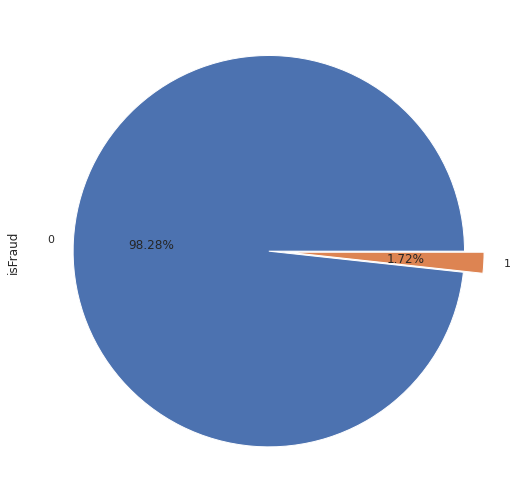

In [ ]:
# Visualizing distribution of fraud and non fraud transactions
sns.set(rc={'figure.figsize':(12,9)})
df.isFraud.value_counts().plot(kind='pie',autopct='%.2f%%',explode=(0,0.1))

Text(0, 0.5, 'Frequency')

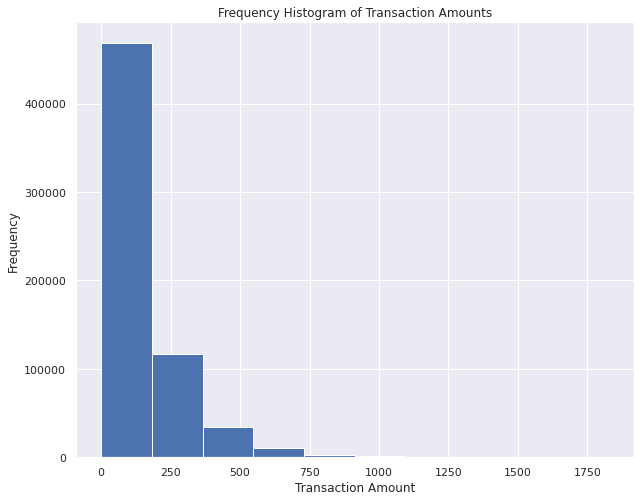

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(df["transactionAmount"])
plt.title("Frequency Histogram of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Density')

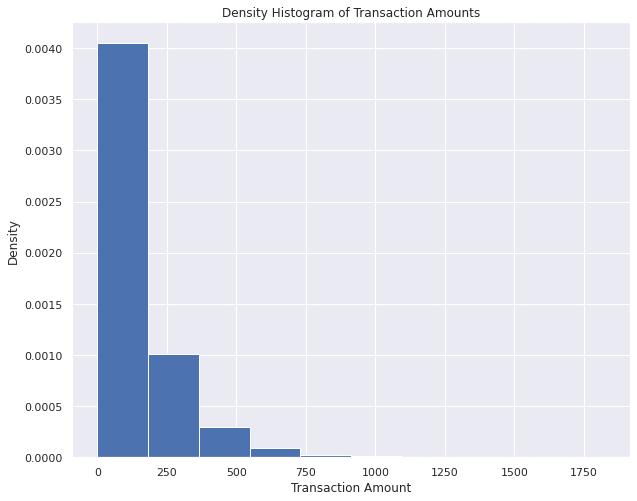

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(df["transactionAmount"], density = True)
plt.title("Density Histogram of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")

Selama analisis data eksplorasi transaksi, penting untuk memahami bentuk distribusi fitur. Ini akan memungkinkan kita untuk melihat kemiringan distribusi, serta mengidentifikasi outlier yang mungkin ada. Salah satu fitur yang sangat menarik dalam data untuk diperiksa adalah kolom TransactionAmount yang mewakili jumlah yang diproses dari setiap record transaksi. Fitur ini membantu untuk menentukan apakah transaksi tertentu adalah penipuan atau tidak.

Text(0.5, 1.0, 'Distribution of Fraud transactionAmount')

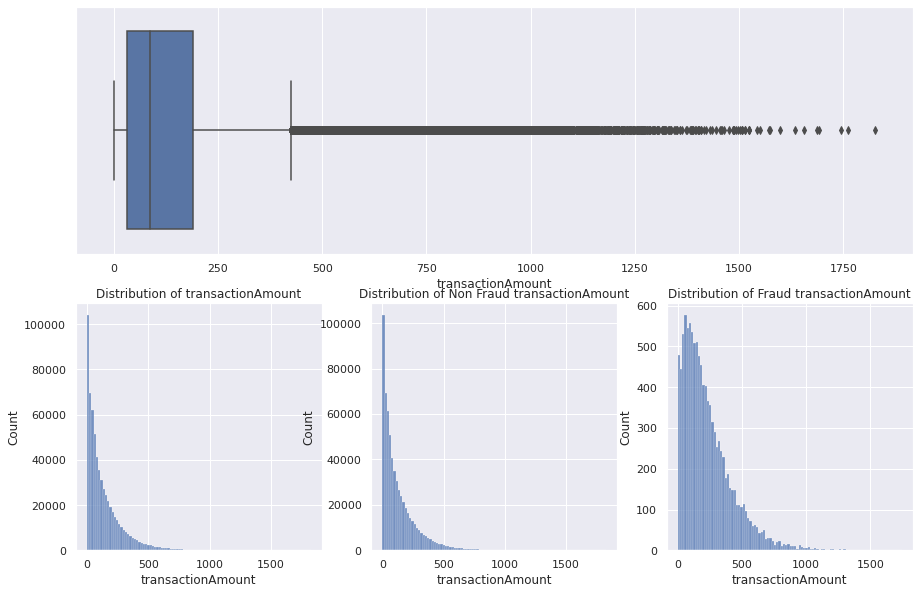

In [ ]:
# Visualization distribution of transactionAmount
fig = plt.subplots(figsize=(15,10))
sns.boxplot(df.transactionAmount, ax=plt.subplot(211))
sns.histplot(df.transactionAmount, bins=100, ax=plt.subplot(234)).set_title('Distribution of transactionAmount')
sns.histplot(df[df.isFraud==0].transactionAmount, bins=100, ax=plt.subplot(235)).set_title('Distribution of Non Fraud transactionAmount')
sns.histplot(df[df.isFraud==1].transactionAmount, bins=100, ax=plt.subplot(236)).set_title('Distribution of Fraud transactionAmount')

Perhatikan boxplot di atas, pada boxplot transactionAmount tersebut memiliki banyak sekali outlier, ini menunjukan bahwa variable transactionAamount memiliki pengaruh yang sangat besar dalam fitur menentukan fraud. Distribusi yang sangat miring dan memiliki kurtosis yang tinggi ini berarti bahwa jumlah transaksi tidak memiliki distribusi simetris dan sebagian besar nilai terletak pada ujung yang jumlah lebih kecil.

Jadi, dari histogram yang terbentuk diketahui Fraund transactionAmont memiliki distribusi yang merata dan dimana transaksi fraud sering terjadi pada jumlah kecil yang berkisar antara 100 hingga 500. Sehingga dapat diketahui bahwa transaksi dengan jumlah kecil harus dipantau lebih jauh untuk mendeteksi dan mencegah penipuan kartu kredit.

In [ ]:
#show mean of transaction amount
print("Mean Transaction Amount:", np.mean(df["transactionAmount"]))

Mean Transaction Amount: 135.19063562758146


In [ ]:
#show median of transaction amount
print("Median Transaction Amount:", np.median(df["transactionAmount"]))

Median Transaction Amount: 85.82


In [ ]:
#show mean transaction amount (non-fraud)
print("Mean Transaction Amount (Non-Fraud):", np.mean(df[df["isFraud"]==False]["transactionAmount"]))

Mean Transaction Amount (Non-Fraud): 133.48826134835


In [ ]:
#show mean transaction amount (fraud)
print("Mean Transaction Amount (Fraud):", np.mean(df[df["isFraud"]==True]["transactionAmount"]))

Mean Transaction Amount (Fraud): 232.5557537642306


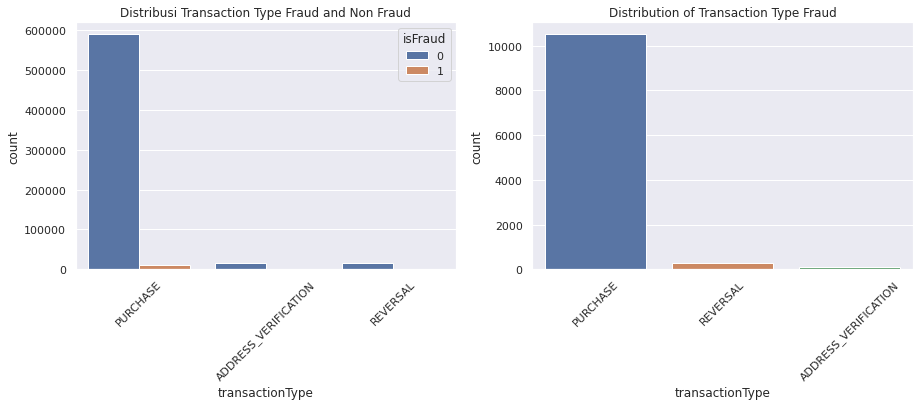

In [ ]:
# Fraud detection based on transaction type
fig = plt.subplots(figsize=(15,10))
sns.countplot(x='transactionType', hue='isFraud', data = df,ax=plt.subplot(221)).set_title('Distribusi Transaction Type Fraud and Non Fraud')
plt.xticks(rotation=45)
sns.countplot(x=df[df.isFraud==1].transactionType, data = df,ax=plt.subplot(222)).set_title('Distribution of Transaction Type Fraud')
plt.xticks(rotation=45)
plt.show()

Data bar plot diatas menunjukkan bahwa, 
- Terdapat transaksi dengan tipe *purchase* memiliki jumlah transaksi penipuan / transaksi fraud terbesar.  
- Terdapat transaksi dengan tipe *Reversal* yang mengacu pada situasi kegagalan transaksi. Maka transaksi reversal harus diawasi.
- Terdapat transaksi dengan tipe *address verification* lebih kecil mengalami transaksi fraud dibandingkan dengan tipe transaksi lainnya. Sehingga, transaksi tipe ini bisa menjadi solusi dari transaksi fraud.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633846 entries, 0 to 641913
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             633846 non-null  int64         
 1   customerId                633846 non-null  int64         
 2   creditLimit               633846 non-null  int64         
 3   availableMoney            633846 non-null  float64       
 4   transactionDateTime       633846 non-null  datetime64[ns]
 5   transactionAmount         633846 non-null  float64       
 6   merchantName              633846 non-null  object        
 7   acqCountry                633846 non-null  object        
 8   merchantCountryCode       633846 non-null  object        
 9   posEntryMode              633846 non-null  object        
 10  posConditionCode          633846 non-null  object        
 11  merchantCategoryCode      633846 non-null  object        
 12  cu

In [ ]:
df.drop(['availableMoney','acqCountry','creditLimit', 'accountNumber',
         'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode',
         'currentExpDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
         'cardPresent', 'cardPresent', 'expirationDateKeyInMatch', 'matchingCVV'], inplace = True, axis = 1)
df

,customerId,transactionDateTime,transactionAmount,merchantName,accountOpenDate,transactionType,isFraud,currentBalance
0,733493772,2016-01-08 19:04:50,111.33,Lyft,2014-08-03,PURCHASE,1,0.00
1,733493772,2016-01-09 22:32:39,24.75,Uber,2014-08-03,PURCHASE,0,111.33
2,733493772,2016-01-11 13:36:55,187.40,Lyft,2014-08-03,PURCHASE,0,136.08
3,733493772,2016-01-11 22:47:46,227.34,Lyft,2014-08-03,PURCHASE,1,323.48
4,733493772,2016-01-16 01:41:11,0.00,Lyft,2014-08-03,ADDRESS_VERIFICATION,0,550.82
...,...,...,...,...,...,...,...,...
641909,186770399,2016-12-04 12:29:21,5.37,Apple iTunes,2015-11-04,PURCHASE,0,4925.98
641910,186770399,2016-12-09 04:20:35,223.70,Blue Mountain eCards,2015-11-04,PURCHASE,0,4931.35
641911,186770399,2016-12-16 07:58:23,138.42,Fresh Flowers,2015-11-04,PURCHASE,0,5155.05
641912,186770399,2016-12-19 02:30:35,16.31,abc.com,2015-11-04,PURCHASE,0,5293.47


In [ ]:
df.drop(['currentBalance'], inplace = True, axis = 1)
df

,customerId,transactionDateTime,transactionAmount,merchantName,accountOpenDate,transactionType,isFraud
0,733493772,2016-01-08 19:04:50,111.33,Lyft,2014-08-03,PURCHASE,1
1,733493772,2016-01-09 22:32:39,24.75,Uber,2014-08-03,PURCHASE,0
2,733493772,2016-01-11 13:36:55,187.40,Lyft,2014-08-03,PURCHASE,0
3,733493772,2016-01-11 22:47:46,227.34,Lyft,2014-08-03,PURCHASE,1
4,733493772,2016-01-16 01:41:11,0.00,Lyft,2014-08-03,ADDRESS_VERIFICATION,0
...,...,...,...,...,...,...,...
641909,186770399,2016-12-04 12:29:21,5.37,Apple iTunes,2015-11-04,PURCHASE,0
641910,186770399,2016-12-09 04:20:35,223.70,Blue Mountain eCards,2015-11-04,PURCHASE,0
641911,186770399,2016-12-16 07:58:23,138.42,Fresh Flowers,2015-11-04,PURCHASE,0
641912,186770399,2016-12-19 02:30:35,16.31,abc.com,2015-11-04,PURCHASE,0


In [ ]:
df.to_csv('datafp_shafa.csv')

# MODELING REGRESSION

In [ ]:
scaler = StandardScaler()
df['Normalized_Amount'] = scaler.fit_transform(df.transactionAmount.values.reshape(-1,1)) # Normalizing values
# Dropping columns
df.drop(['transactionAmount', 'transactionDateTime', 'customerId', 'merchantName', 'accountOpenDate', 'transactionType'], inplace = True, axis = 1)
df

,isFraud,Normalized_Amount
0,1,-0.162212
1,0,-0.750811
2,0,0.354936
3,1,0.626461
4,0,-0.919069
...,...,...
641909,0,-0.882562
641910,0,0.601715
641911,0,0.021954
641912,0,-0.808188


In [ ]:
Y = df.isFraud
X = df.drop(['isFraud'],axis = 1)
(train_x,test_x,train_y,test_y) = train_test_split(X,Y, test_size=0.3, random_state=42)

print("train_x size: ", train_x.shape)
print("test_x size: ", test_x.shape)

train_x size:  (443692, 1)
test_x size:  (190154, 1)


In [ ]:
# Preparing Classifiers
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100)

# Decision Tree
decision_tree.fit(train_x,train_y)
predictions_dt = decision_tree.predict(test_x)
decision_tree_score = round(decision_tree.score(test_x,test_y) * 100, 2)

# Random Forest
random_forest.fit(train_x,train_y)
prediction_rf = random_forest.predict(test_x)
random_forest_score = round(random_forest.score(test_x,test_y) * 100,2)

print('Decision Tree Performance: ', decision_tree_score)
print('Random Forest Performance: ', random_forest_score)

Decision Tree Performance:  98.02
Random Forest Performance:  97.98


In [ ]:
# Preparing Classifiers
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators=100)

# Decision Tree
decision_tree.fit(train_x,train_y)
predictions_dt = decision_tree.predict(test_x)
decision_tree_score = round(decision_tree.score(test_x,test_y) * 100, 2)

# Random Forest
random_forest.fit(train_x,train_y)
prediction_rf = random_forest.predict(test_x)
random_forest_score = round(random_forest.score(test_x,test_y) * 100,2)

print('Decision Tree Performance: ', decision_tree_score)
print('Random Forest Performance: ', random_forest_score)

Decision Tree Performance:  98.02
Random Forest Performance:  97.98


In [ ]:
# Printing performance metrics for Decision Tree classifier
metrics_decision_tree = [['Accuracy',(accuracy_score(test_y, predictions_dt))],
                         ['Precision',precision_score(test_y, predictions_dt)],
                         ['Recall', recall_score(test_y, predictions_dt)],
                         ['F1_score',f1_score(test_y, predictions_dt)]]
metric_values_decision_tree = pd.DataFrame(metrics_decision_tree, columns = ['Metrics', 'Result'])
metric_values_decision_tree

,Metrics,Result
0,Accuracy,0.980169
1,Precision,0.070746
2,Recall,0.011138
3,F1_score,0.019246


[Text(0, 0.5, 'Non Fraud'), Text(0, 1.5, 'Fraud')]

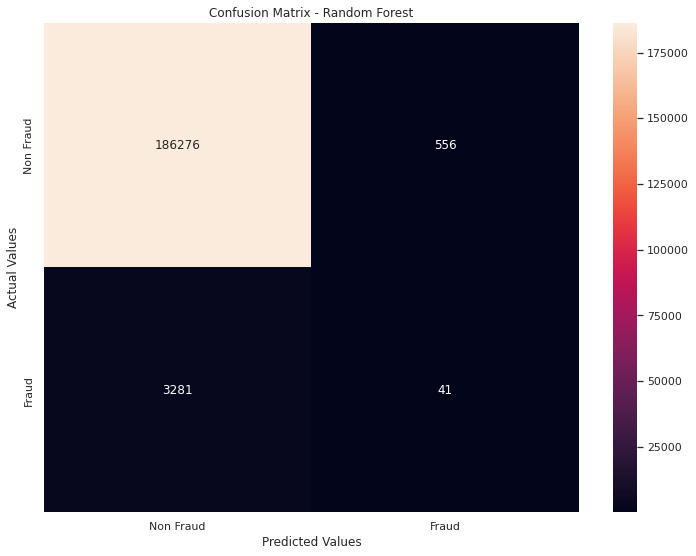

In [ ]:
# Confusion Matrix
confusion_matrix_random_forest = confusion_matrix(test_y, prediction_rf)
# Visualization
ax = plt.subplot()
sns.heatmap(confusion_matrix_random_forest, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Non Fraud','Fraud'])

In [ ]:
# Importing SMOTE from imblearn lib
from imblearn.over_sampling import SMOTE
resampled_x, resampled_y = SMOTE().fit_resample(X,Y) # reshaping data

print('X New Shape: ', resampled_x.shape)
print('Y New Shape: ', resampled_y.shape)

X New Shape:  (1245908, 1)
Y New Shape:  (1245908,)


In [ ]:
# Splitting our resampled data
(train_x,test_x,train_y,test_y) = train_test_split(resampled_x, resampled_y,
                                                  test_size = 0.3, random_state = 42)

# Applying Random Forest Classifier with new resampled data
resampled_random_forest = RandomForestClassifier(n_estimators = 100)
resampled_random_forest.fit(train_x,train_y)

predictions_resampled = resampled_random_forest.predict(test_x)
random_forest_new_score = round(resampled_random_forest.score(test_x,test_y) * 100, 4)
print('Performance: ', random_forest_new_score)

Performance:  90.7366


In [ ]:
# Random Forest Evaluation metrics after oversampling
metrics_random_forest_resampled = [['Accuracy',(accuracy_score(test_y, predictions_resampled))],
                         ['Precision',precision_score(test_y, predictions_resampled)],
                         ['Recall', recall_score(test_y, predictions_resampled)],
                         ['F1_score',f1_score(test_y, predictions_resampled)]]
metric_values_random_forest_resampled = pd.DataFrame(metrics_random_forest_resampled, columns = ['Metrics', 'Results'])
metric_values_random_forest_resampled

,Metrics,Results
0,Accuracy,0.907366
1,Precision,0.947942
2,Recall,0.862028
3,F1_score,0.902946


[Text(0, 0.5, 'Non Fraud'), Text(0, 1.5, 'Fraud')]

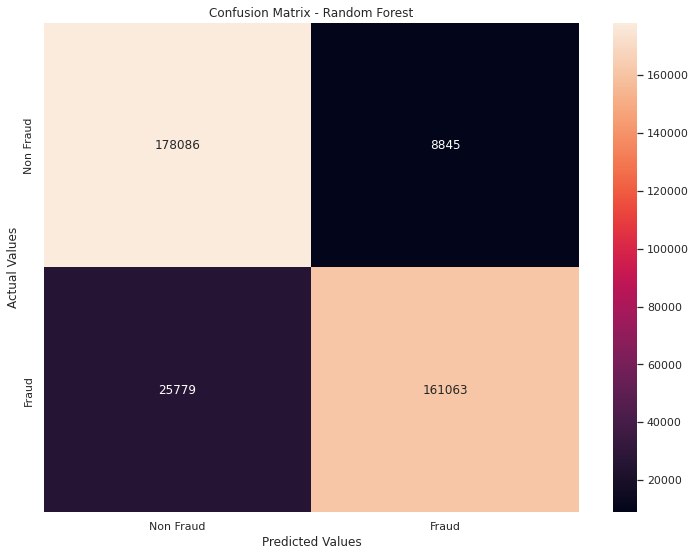

In [ ]:
# Confusion Matrix
confusion_matrix_random_forest_resampled = confusion_matrix(test_y, predictions_resampled)
# Visualization
ax = plt.subplot()
sns.heatmap(confusion_matrix_random_forest_resampled, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Non Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Non Fraud','Fraud'])

In [ ]:
#define the predictor variables and the response variable
Y = df.isFraud
X = df.drop(['isFraud'],axis = 1)

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,Y_train)

LogisticRegression()

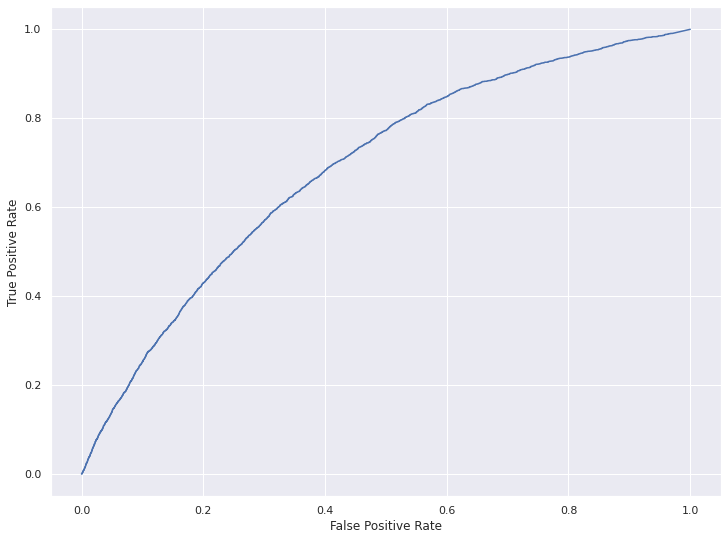

In [ ]:
#define metrics
Y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()